### Problem Statement



Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

Aim: To make model that can consider the data provided and predict the Average Price of avocado.

### Importing the required libraries

In [558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [559]:
df=pd.read_csv('avocado.csv') #loading the dataset and storing it into dataframe named df

In [560]:
# Printing the first five reords of the dataframe
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [561]:
# Printing the last 5 data points
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


The details of each and every column are as follows:

 Unamed	   :  No use of this column , It will be removed later
 
 Type         :  conventional or organic
 
 Year         :  the year
 
 Date         : represent YY:MM:DD format
 
 Region -     :  the city or region of the observation
 
 Total Volume :  Total sales volume of avocados
 
 4046	       :  Total sales volume of Small/Medium Hass Avocado

 4225	       :  Total sales volume of Large Hass Avocado

 4770	       :  Total sales volume of Extra Large Hass Avocado

 Total Bags   :  Total number of Bags sold

 Small Bags   : Total number of Small Bags sold

 Large Bags   : Total number of Large Bags sold

 XLarge Bags  : Total number of XLarge Bags sold


In [562]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [563]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [564]:
df.shape

(18249, 13)

Dataset has 18249 rows and 13 columns

In [565]:
df.size

237237

Dataset has 255486 number of elements

In [566]:
# Shows all 13 columns names
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [567]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Only 3 Columns are of object type Date,type and year which we will need to encode later

All other columns comes under numerical features

In [568]:
# Return the unique values present in each column
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [569]:
# Summarize the dataset in statistical format
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [570]:
# Chekcin for missing value in dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing value in the dataset

### Exploratory Data anaylsis(EDA)

In [571]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

We have two type of avocado Conventional and Organic.

In [572]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

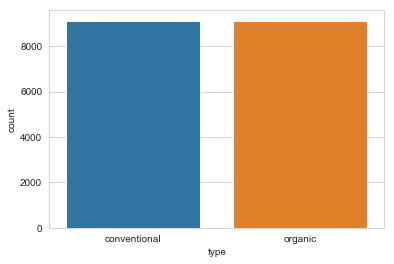

In [573]:
sn.countplot(df['type'])

Both the type of conventional and organic avocado are approximately equal in number.

In [574]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

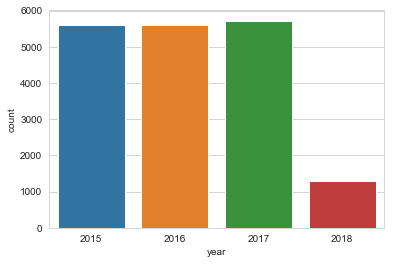

In [575]:
sn.countplot(df['year'])

Data show most year 2015,2016 and 2017 have equal number of records whreas 2018 have least number of records.

In [576]:
df['region'].nunique()

54

There are total 54 regions

In [577]:
df['region'].value_counts()

Louisville             338
CincinnatiDayton       338
Spokane                338
StLouis                338
SouthCarolina          338
HartfordSpringfield    338
Seattle                338
Albany                 338
Southeast              338
Boise                  338
Roanoke                338
Northeast              338
SanFrancisco           338
California             338
RaleighGreensboro      338
Plains                 338
Boston                 338
Jacksonville           338
LasVegas               338
HarrisburgScranton     338
Columbus               338
SanDiego               338
Indianapolis           338
Detroit                338
Midsouth               338
Orlando                338
Pittsburgh             338
Tampa                  338
Portland               338
Atlanta                338
SouthCentral           338
DallasFtWorth          338
West                   338
PhoenixTucson          338
Philadelphia           338
GreatLakes             338
GrandRapids            338
L

All the region have equal number of avocado present.

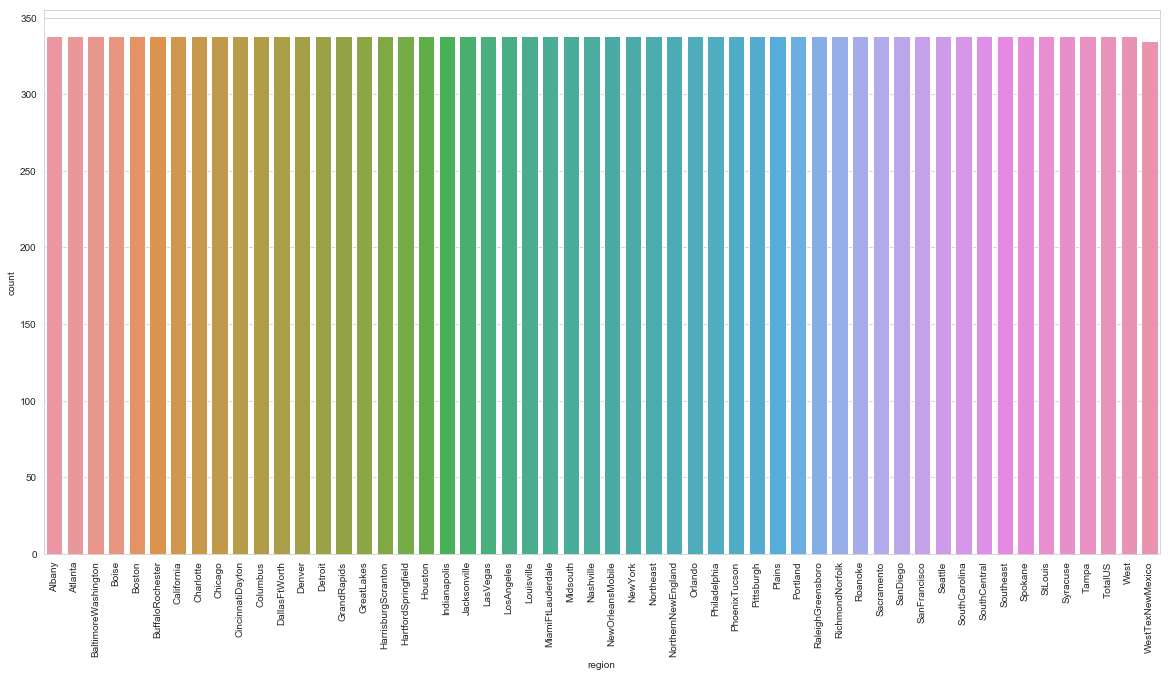

In [578]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sn.countplot(df['region'])

Only West Tex New Mexico has slighlty less amount of avocado and all other region have equal number of avocados.

In [579]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Text(0.5, 1.0, 'Average Price')

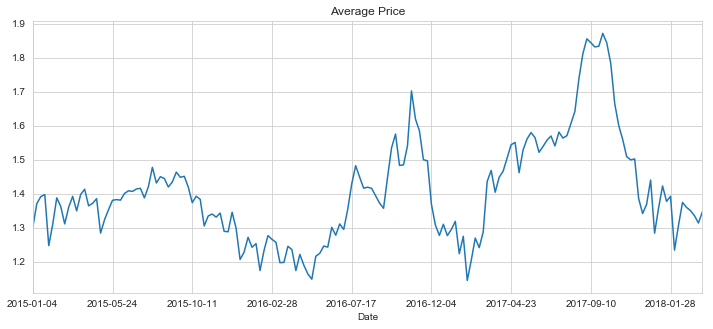

In [580]:
dategroup=df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average Price')

Show the average price of avocado with every year

In [581]:
# Numerical features
Numerical=df.iloc[:,1:10]
Numerical

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00


#### Plotting distribution Plot for numerical column

62505646.52

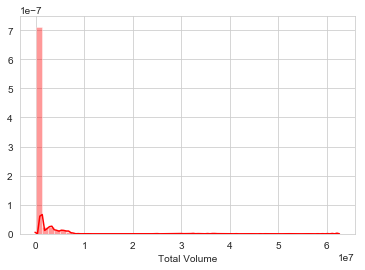

In [582]:
sn.distplot(df['Total Volume'],color='r')
df['Total Volume'].max()

Data is highly skewed to the right ,Most of the Total volume of Avacados is below 1e7 volumes and max is 62505646.52 volumes

22743616.17

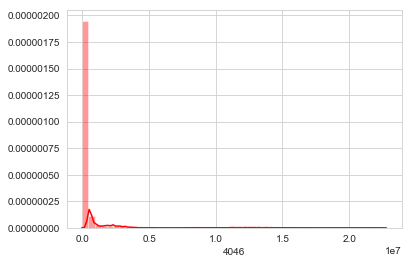

In [583]:
sn.distplot(df['4046'],color='r')
df['4046'].max()

Avacados with Product look up code 4046 is mostly near the minimum whereas the range goes up to 22743616.17.

20470572.61

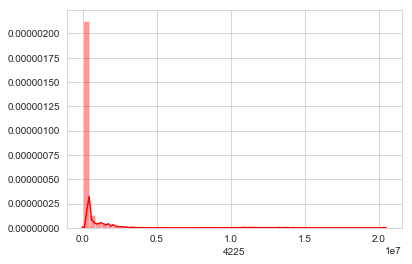

In [584]:
sn.distplot(df['4225'],color='r')
df['4225'].max()

Avacados with Product look up code 4046 is mostly near the minimum whereas the range goes up to 20470572.61

2546439.11

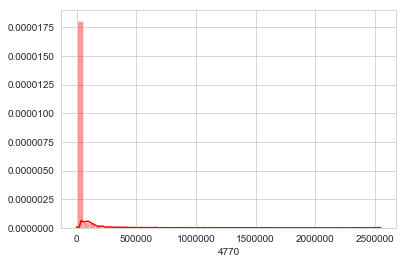

In [585]:
sn.distplot(df['4770'],color='r')
df['4770'].max()

Avacados with Product look up code 4770 is mostly near the minimum whereas the range goes up to 2546439.11.

19373134.37

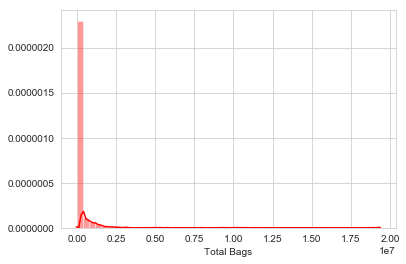

In [586]:
sn.distplot(df['Total Bags'],color='r')
df['Total Bags'].max()

Total bags has most of its density near to its minimum value and maximum value it goes up to a range of 19373134.37 

13384586.8

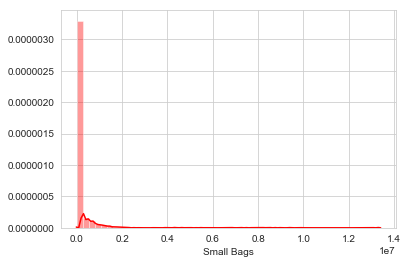

In [587]:
sn.distplot(df['Small Bags'],color='r')
df['Small Bags'].max()

Small bags has most of its density near to its minimum value and maximum value it goes up to a range of 13384586.8.

5719096.61

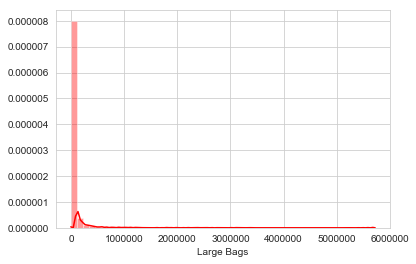

In [588]:
sn.distplot(df['Large Bags'],color='r')
df['Large Bags'].max()

Large bags has most of its density near to its minimum value and maximum value it goes up to a range of 5719096.61

551693.65

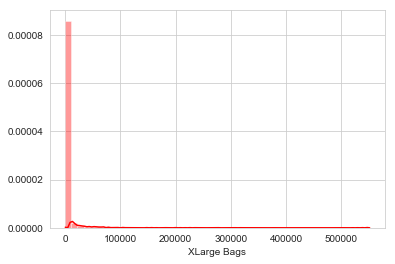

In [589]:
sn.distplot(df['XLarge Bags'],color='r')
df['XLarge Bags'].max()

XLarge bags has most of its density near to its minimum value and maximum value it goes up to a range of 551693.65

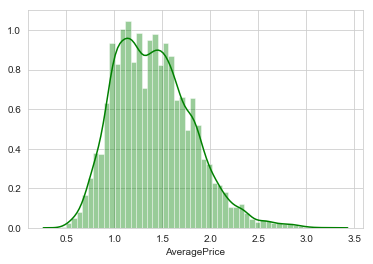

In [590]:
sn.distplot(df['AveragePrice'],color='g')

Average price of avacados little skewed, price ranging from 0.44 t0 3.25

### Plotting box plot

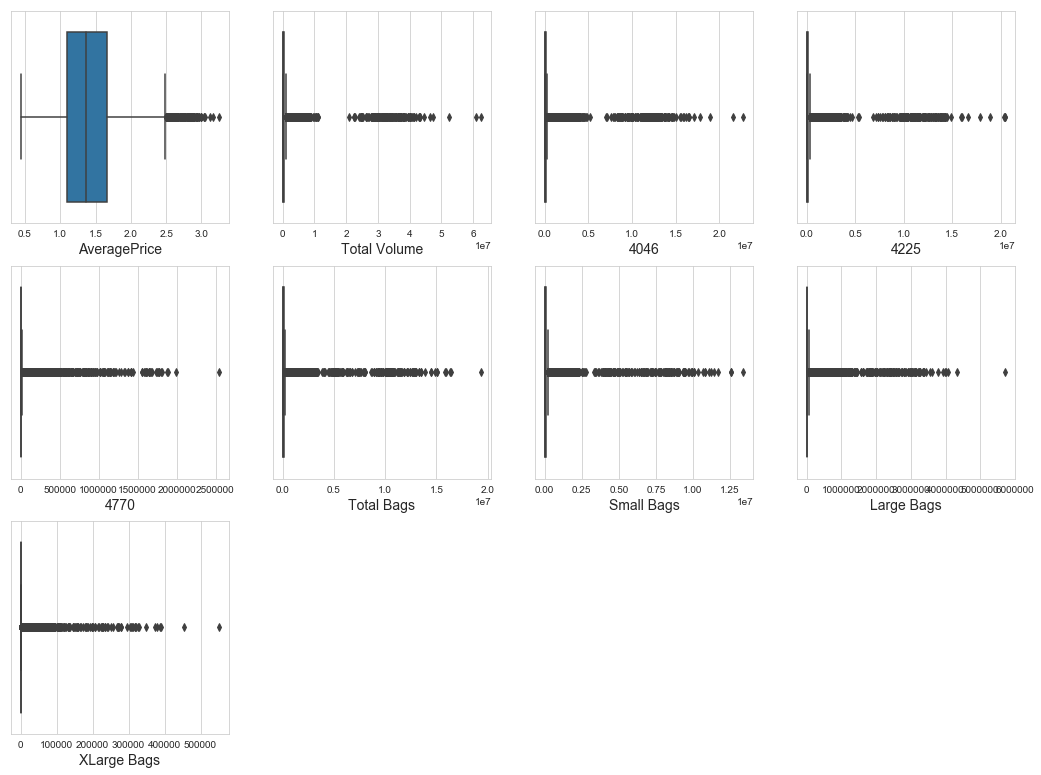

In [591]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in Numerical:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

There are a large number of outliers present in all the features that is needed to be removed.

### Bivariate Anaylsis

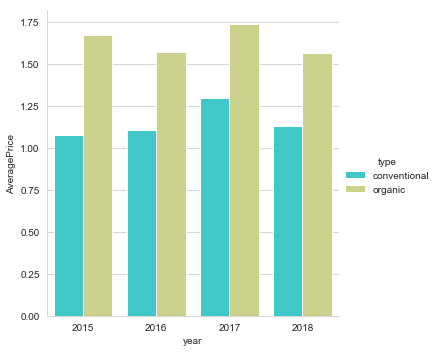

In [592]:
sn.factorplot(x='year', y='AveragePrice', data=df,hue='type',kind='bar',palette='rainbow',ci=None)

Conventional type of avocado are present highest in year 2017

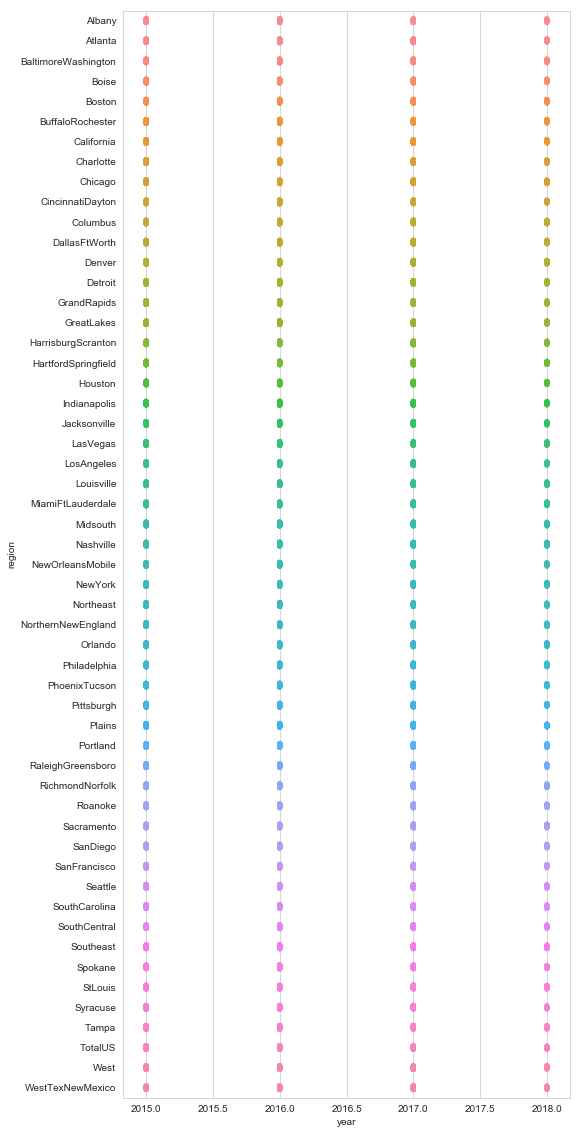

In [593]:
plt.figure(figsize=(8,20))
sn.stripplot(x='year',y='region',data=df)

Avocado are collected from all the region irrespective of year

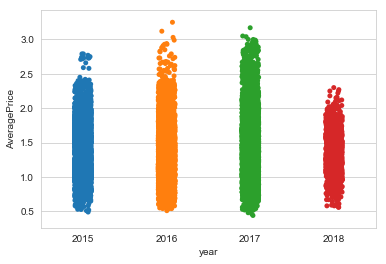

In [594]:
#plt.figure(figsize=(8,6))
sn.stripplot(x='year',y='AveragePrice',data=df)

Average price is highest in year 2016 and lowest in year 2018

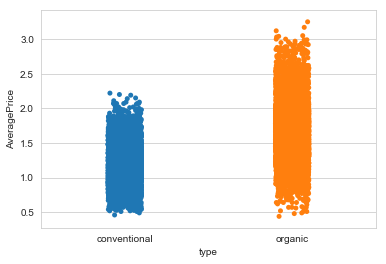

In [595]:
sn.stripplot(x='type',y='AveragePrice',data=df)

Average price of organic type is costlier than conventional one.

#### Plotting scatter plot of average price with all other features

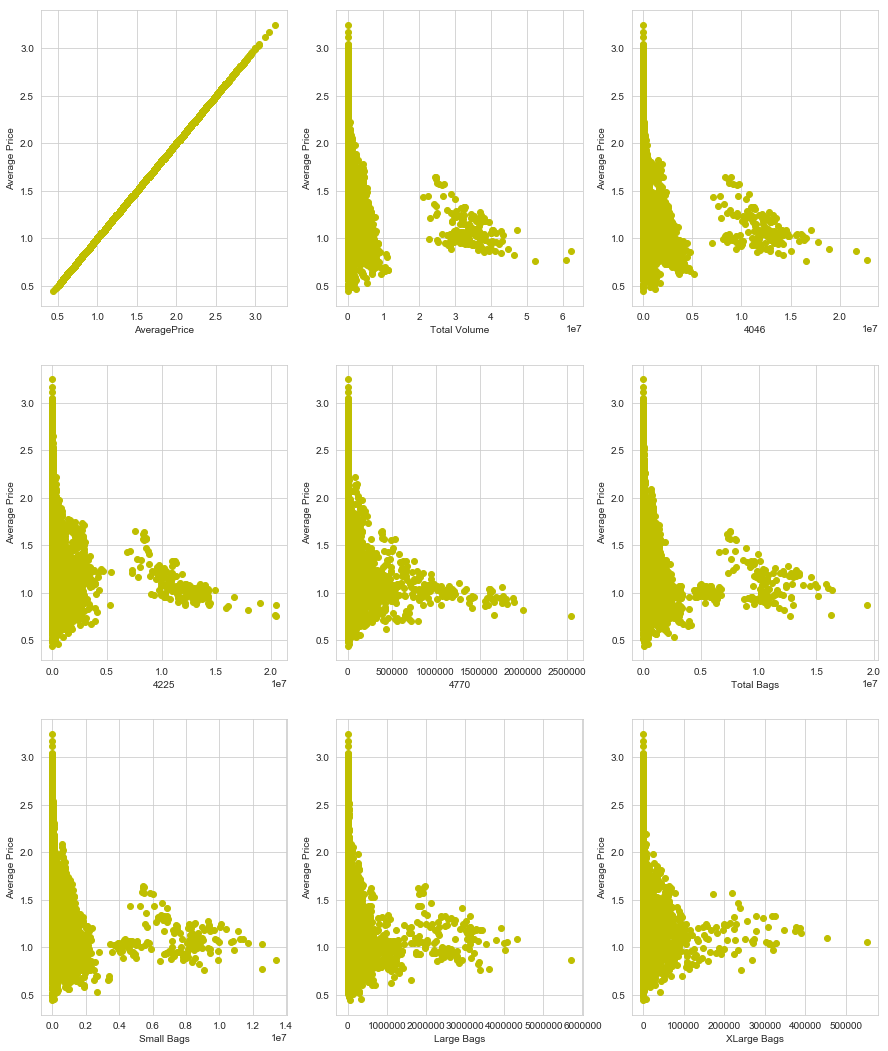

In [596]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in Numerical:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(Numerical[column],df['AveragePrice'],color='y')
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Average Price')
    plotnumber=plotnumber+1
plt.show()

Average price shows a negative correlation, as the average price decreases as total volumes, PLU's and types of bags increases which means that average price decreases as the quantity of avacado's increases.

### Plotting relationship between among the variables

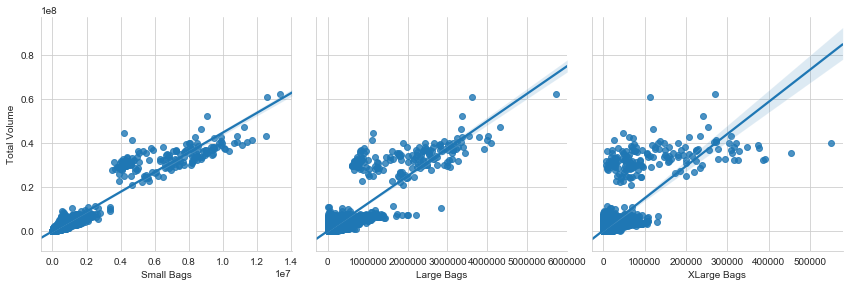

In [597]:
sn.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=4, aspect=1, kind='reg')

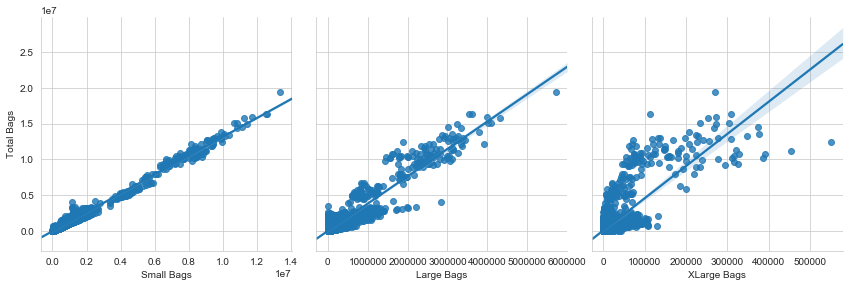

In [598]:
sn.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

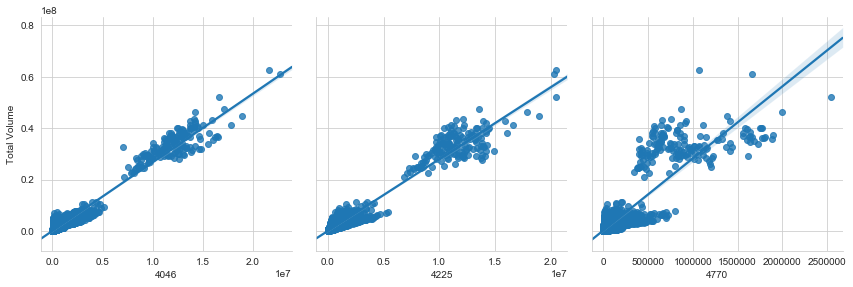

In [599]:
sn.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Volume', size=4, aspect=1, kind='reg')

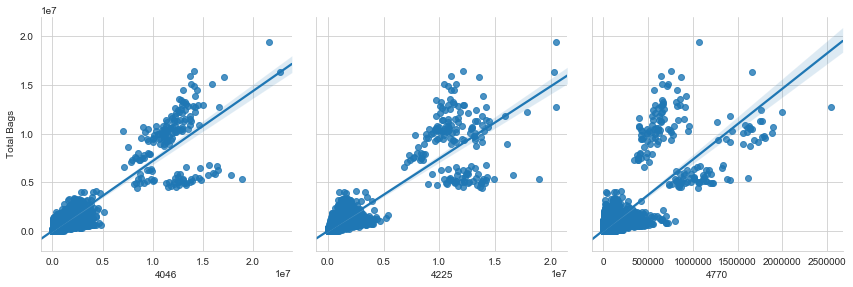

In [600]:
sn.pairplot(df, x_vars=['4046', '4225', '4770'], y_vars='Total Bags', size=4, aspect=1, kind='reg')

- The above graph are plotted in order to know the how the variables are correalting with Total Volumes and Total Bags column.
- It shows strong positive correlation with '4046', '4225', '4770' 'Small Bags', 'Large Bags', 'XLarge Bags'.

### Region vs Average Price Prediction

Text(0.5, 1.0, 'Average Price in Each Region')

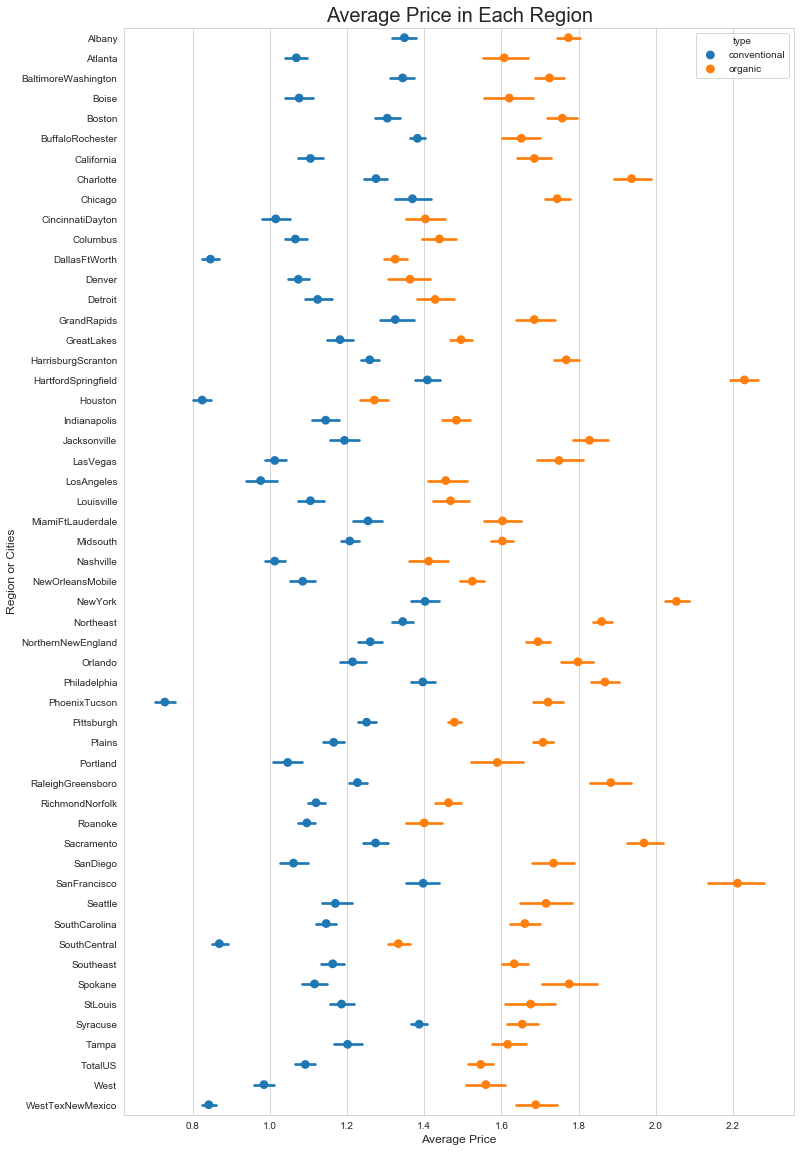

In [601]:
plt.figure(figsize=(12,20))
sn.set_style('whitegrid')
sn.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xlabel('Average Price',{'fontsize' : 'large'})
plt.ylabel('Region or Cities',{'fontsize':'large'})
plt.title("Average Price in Each Region",{'fontsize':20})

The above grapgh here will show the Region wise distribution of the average price.

We can see that all the price of  conventional avocado are mostly less than 1.4 are sold in almost all the region whereas, the Organic avocado are sold mostly above the average price of 1.4 in lesser region as compared to conventional one. 

### Multivariate anaylsis

In [602]:
#Finding the correlation values
cor=df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


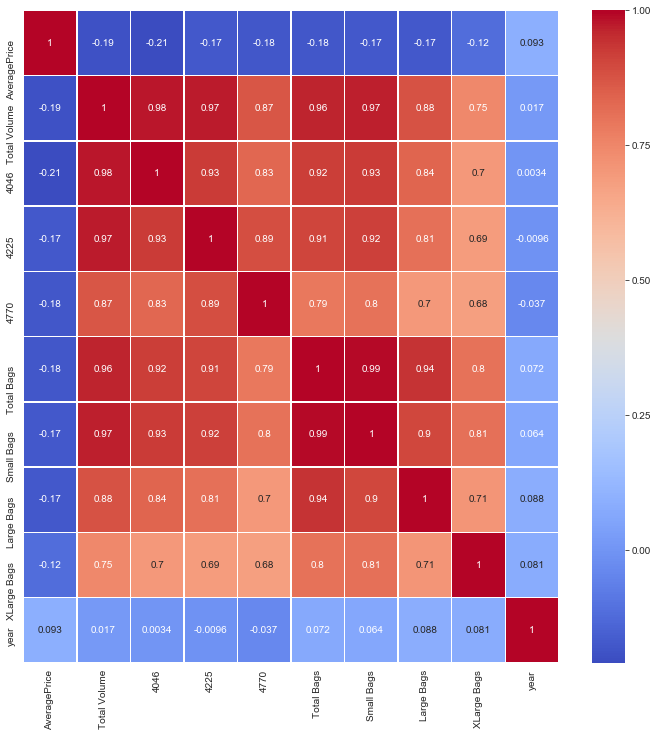

In [603]:
#Plotting heatmap
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

- Small Bag and Total Bag have highest correlation value of 0.99 
- Small Bag and Total Volume are strongly correlated with each other having value as 0.97
- Total Volume and Total Bags are strongly positively correlated with features '4046', '4225', '4770' 'Small Bags', 'Large Bags', 'XLarge Bags'.

In [604]:
# Dropping the unecessary columns
df.drop(['Date', 'year','region'], axis = 1,inplace = True)

### Encoding

In [605]:
# Encoding the type column

In [606]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

### Removing the outlier

In [607]:
# Removing the outliers of the data using Z_Score method
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3.57).all(axis=1)]

In [608]:
new_df.shape

(17852, 10)

In [609]:
df.shape

(18249, 10)

In [610]:
# Calculating data loss percentage
loss=(18249-17651)/18249*100
loss

3.276891884486821

Data loss percentage is less than 3.28 percentage so it feasiable to use z_score

### Checking for Skewness

In [611]:
new_df.skew()

AveragePrice    0.489112
Total Volume    3.687319
4046            4.773721
4225            4.365749
4770            5.266465
Total Bags      4.111382
Small Bags      4.216424
Large Bags      5.410824
XLarge Bags     6.239287
type           -0.035187
dtype: float64

Shows that data is highly skewed 
Whereas Normal Skewness range is -0.5 to + 0.5 but almost all of the columns are out of the range

In [612]:
skewed_columns=['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [613]:
log_columns=['Total Volume']

### Removing the skewness

In [614]:
# Using power transformation technique
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
new_df[skewed_columns]=scaler.fit_transform(new_df[skewed_columns].values)

In [615]:
# Using log transformation 
new_df[log_columns]=np.log1p(new_df[log_columns])

In [616]:
new_df.skew()

AveragePrice    0.489112
Total Volume   -0.032027
4046           -0.037678
4225           -0.042688
4770            0.025921
Total Bags     -0.019751
Small Bags     -0.022505
Large Bags     -0.107871
XLarge Bags     0.842951
type           -0.035187
dtype: float64

In [617]:
# Plotting the distribution plot for checking the affect of skewness removal 

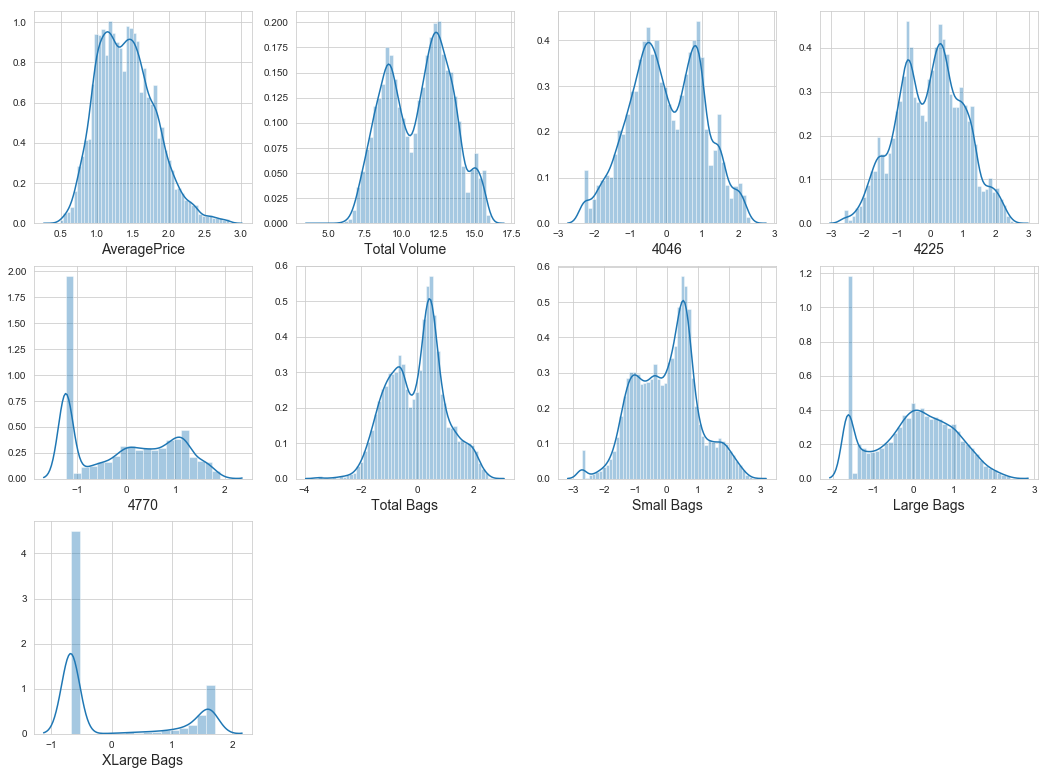

In [618]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in Numerical:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sn.distplot(new_df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

In [619]:
new_df.skew()

AveragePrice    0.489112
Total Volume   -0.032027
4046           -0.037678
4225           -0.042688
4770            0.025921
Total Bags     -0.019751
Small Bags     -0.022505
Large Bags     -0.107871
XLarge Bags     0.842951
type           -0.035187
dtype: float64

Skewness is almost negligible after using power transformation technique only XLarge Bag shows skewness in graph

### Seperating the data into independent and dependent variables

In [620]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x = new_df.drop(['AveragePrice'], axis = 1)
y = new_df.iloc[:,0:1]

In [621]:
print(x.shape)
x.head()

(17852, 9)


,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,11.070344,-0.656680,0.343354,-0.225265,-0.533827,-0.345079,-0.780539,-0.681835,0
1,10.912867,-0.776088,0.262291,-0.178119,-0.494873,-0.309394,-0.770600,-0.681835,0
2,11.680313,-0.730804,0.637769,0.020112,-0.562384,-0.371810,-0.757946,-0.681835,0
3,11.277116,-0.631939,0.459419,-0.124295,-0.707629,-0.506936,-0.698663,-0.681835,0
4,10.840377,-0.683674,0.254978,-0.113669,-0.681126,-0.486680,-0.606800,-0.681835,0


In [622]:
print(y.shape)
y.head()

(17852, 1)


,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28


In [641]:
# Splitting the data into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Using Min Max Scaler

In [649]:
# using min max scalar beacause range of values it between -1 to 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Finding the best random state

In [650]:
from sklearn.linear_model import LinearRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.517083872600747 on random state 174


In [651]:
# Splitting the dataset based on best random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

### Applying different model on the dataset

In [652]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.5176191149474023
Mean absolute error :  0.2183688794126803
Mean Squared error : 0.07624720229938518
Cross validation score is  0.017243881497002733


In [653]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR(kernel = 'rbf')
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.6728393662411312
Mean absolute error :  0.1673464179966628
Mean Squared error : 0.05171242020480886
Cross validation score is  0.22556197943957185


In [654]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.9227106807702488
Mean absolute error :  0.06816998039764771
Mean Squared error : 0.012216683001960235
Cross validation score is  -0.09545565562084331


In [655]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=30, random_state=82)
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.7706073864984851
Mean absolute error :  0.13420787827872677
Mean Squared error : 0.036258785432029615
Cross validation score is  0.11509781607279779


In [631]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Random Forest Regressor']

acc=[svr_score*100,lr_score*100,knn_score*100,rfr_score*100]
mae=[svr_mae,lr_mae,knn_mae,rfr_mae]
mse=[svr_mse,lr_mse,knn_mse,rfr_mse]
cv_score=[svr_cv*100,lr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

,Model,R2_score,Mean Absolute Error,Mean Squared Error,Cross validation_score
0,Linear Regression,66.063297,0.169812,0.052592,22.556198
1,Support Vector Regressor,50.862434,0.216169,0.076149,1.724388
2,K Neighbors Regressor,92.699049,0.067991,0.011314,-9.545566
3,Random Forest Regressor,77.291603,0.133080,0.035191,11.509782


### Choosing the model

- Choosing K Neighbor Regressior model becauase it has highest R2_score of 92.47 more than any other model and least MAE score of 0.06.

### Applying hyperparameter tuning to best model

In [632]:
from sklearn.model_selection import GridSearchCV

In [633]:
parameters={'n_neighbors':[1,4,8,10],'leaf_size':[1,4,8,10],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

In [634]:
GCV=GridSearchCV(KNeighborsRegressor(),parameters,cv=5)

In [635]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 4, 8, 10], 'leaf_size': [1, 4, 8, 10], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [636]:
GCV.best_params_

{'leaf_size': 1,
 'metric': 'manhattan',
 'n_neighbors': 8,
 'weights': 'distance'}

In [637]:
Final_model=KNeighborsRegressor(leaf_size=1, metric='manhattan', n_neighbors=8,weights='distance')
Final_model.fit(x_train,y_train)
y_pred=Final_model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)

R2 Score of the model is  78.92103694340157
Mean absolute error :  0.12685027929625106


### Saving the model

In [638]:
from sklearn.externals import joblib

In [639]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']